### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing dataset
#### The dataset consist of user information of a telecom company.
##### This consist of five files but this there consist the infomation needed. The rest of the files are information concerning the location, city in which the dataset is of the same location US, Califonia.

In [3]:
df1 = pd.read_excel("../Telco_customer_churn_demographics.xlsx")
df2 = pd.read_excel("../Telco_customer_churn_services.xlsx")
df3 = pd.read_excel("../Telco_customer_churn_status.xlsx")

In [4]:
df1.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [5]:
df2.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [6]:
df3.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


### Merging of dataset

In [7]:
df= df1.merge(df2, on=("Customer ID","Count") , how = "right").merge(df3, on=("Customer ID","Count","Quarter") , how = "right")
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


### feature engineering
#### Creating age group between 30 to 64 column

In [8]:
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [9]:
df.columns

Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [12]:
print(df.shape)

(7043, 45)


In [13]:
df.isnull().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support              

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
Age,7043.0,46.509726,16.750352,19.00,32.000,46.00,60.000,80.00
Number of Dependents,7043.0,0.468692,0.962802,0.00,0.000,0.00,0.000,9.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.00,3.000,17.00,27.000,85.00
Monthly Charge,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.850,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79


In [15]:
df.describe(include='O').T

,count,unique,top,freq
Customer ID,7043,7043,8779-QRDMV,1
Gender,7043,2,Male,3555
Under 30,7043,2,No,5642
Senior Citizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,5416
Quarter,7043,1,Q3,7043
Referred a Friend,7043,2,No,3821
Offer,7043,6,None,3877
Phone Service,7043,2,Yes,6361


In [16]:
df.groupby(['Offer','Churn Label']).size().reset_index().rename(columns={0:'Churn Count'})

,Offer,Churn Label,Churn Count
0,None,No,2826
1,None,Yes,1051
2,Offer A,No,485
3,Offer A,Yes,35
4,Offer B,No,723
5,Offer B,Yes,101
6,Offer C,No,320
7,Offer C,Yes,95
8,Offer D,No,441
9,Offer D,Yes,161


In [17]:
Offers = df.groupby('Offer') \
                            .agg(min_Rev = ('Total Revenue', 'min'), \
                                 mean_Rev = ('Total Revenue', 'mean'),
                                 max_Rev = ('Total Revenue', 'max')).round(2)

print(Offers)

         min_Rev  mean_Rev   max_Rev
Offer                               
None       21.40   2926.85  11688.90
Offer A  1579.34   7029.27  11979.34
Offer B   820.90   5082.42  10184.55
Offer C   454.15   2759.25   6027.64
Offer D   212.85   1315.73   3273.07
Offer E    21.36    302.42   1351.16


In [10]:
def tenure_group(row):
    if row['Tenure in Months'] <=12:
        result = '1 year'
    elif row['Tenure in Months'] <=24:
        result = '2 years'
    elif row['Tenure in Months'] <=36:
        result = '3 years'
    else:
        result = '4 years+'
    return result

df['Tenure'] = df.apply(tenure_group, axis = 1)

In [11]:
def Distance_call(row):
    if row['Total Long Distance Charges'] == 0:
        result = 'No'
    else:
        result = 'Yes'
    return result

df['Distance call'] = df.apply(Distance_call, axis = 1)

In [12]:
def Promo(row):
    if row['Offer'] == 'None':
        result = 'No'
    else:
        result = 'Yes'
    return result

df['Campaign'] = df.apply(Promo, axis = 1)

In [13]:
def age_group(row):
    if row['Age'] <=29:
        result = 'Under_30'
    elif row['Age'] >=65:
        result = 'Senioir_citizen'
    else:
        result = 'Young_adult'
    return result

df['age group'] = df.apply(age_group, axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Quarter                            7043 non-null   object 
 10  Referred a Friend                  7043 non-null   object 
 11  Number of Referrals                7043 non-null   int64

In [22]:
df.isnull().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support              

In [40]:
df.groupby(df['Unlimited Data'])['Avg Monthly GB Download', 'Total Extra Data Charges' ].agg(['count', 'mean']).T

Unlimited Data                           No          Yes
Avg Monthly GB Download  count  2298.000000  4745.000000
                         mean      8.920366    26.130875
Total Extra Data Charges count  2298.000000  4745.000000
                         mean     21.026980     0.000000

In [44]:
df.groupby(['Total Extra Data Charges'] )['Count'].agg(['count', 'mean']).T

Total Extra Data Charges,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150
count,6315.0,138.0,51.0,58.0,62.0,43.0,36.0,34.0,47.0,35.0,44.0,32.0,28.0,40.0,38.0,42.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [23]:
df.tail()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Tenure,Distance call,Campaign,age group
7038,2569-WGERO,1,Female,30,No,No,No,No,0,Q3,...,No,0,45,5306,NaN,NaN,4 years+,Yes,No,Young_adult
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,Q3,...,No,0,59,2140,NaN,NaN,2 years,Yes,Yes,Young_adult
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,Q3,...,No,0,71,5560,NaN,NaN,4 years+,Yes,No,Young_adult
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,Q3,...,No,0,59,2793,NaN,NaN,1 year,No,No,Young_adult
7042,3186-AJIEK,1,Male,44,No,No,No,No,0,Q3,...,No,0,38,5097,NaN,NaN,4 years+,Yes,No,Young_adult


### Exploring Data

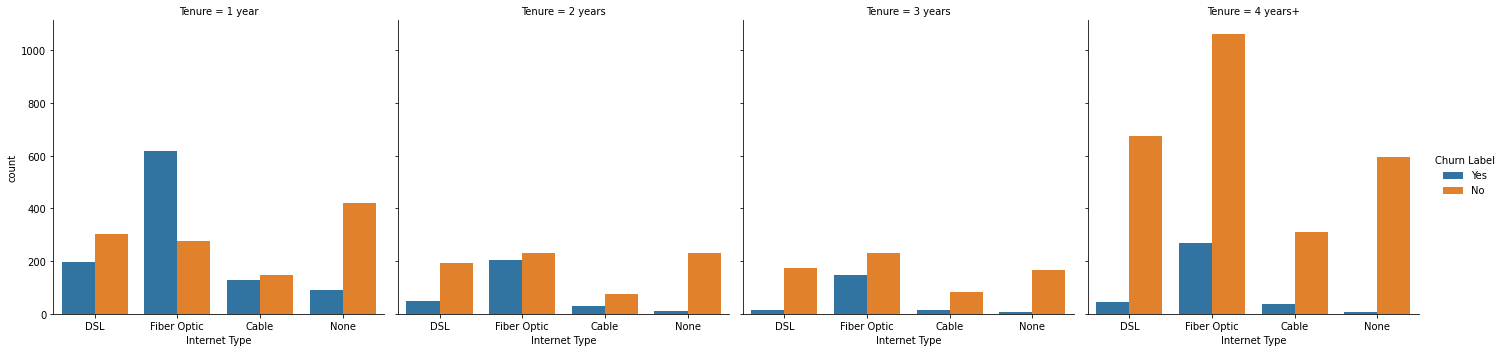

In [25]:
sns.catplot(x='Internet Type', hue='Churn Label', col='Tenure', kind='count', data=df)

In [18]:
# df_cor = df.corr()
# df_cor.style.background_gradient(cmap= 'coolwarm')

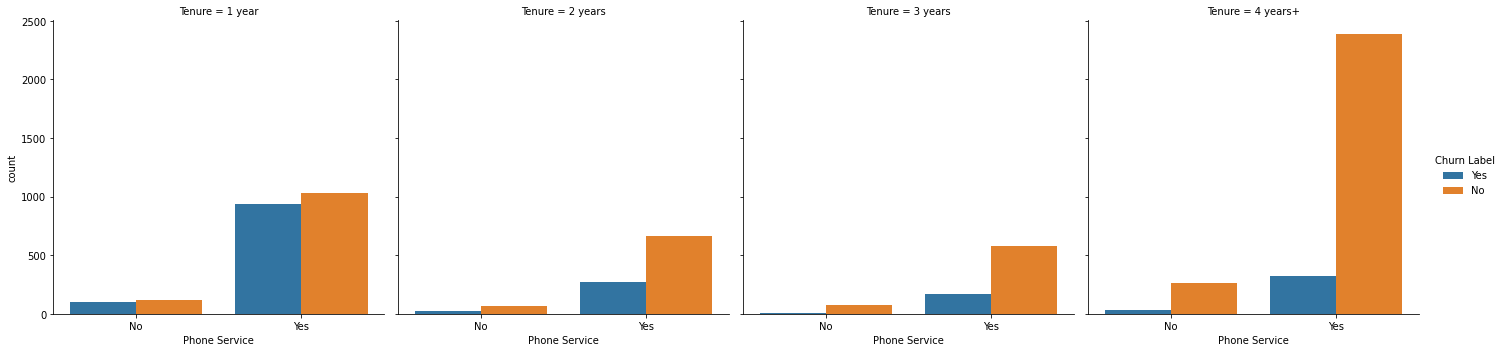

In [26]:
sns.catplot(x='Phone Service', hue='Churn Label', col='Tenure', kind='count', data=df)

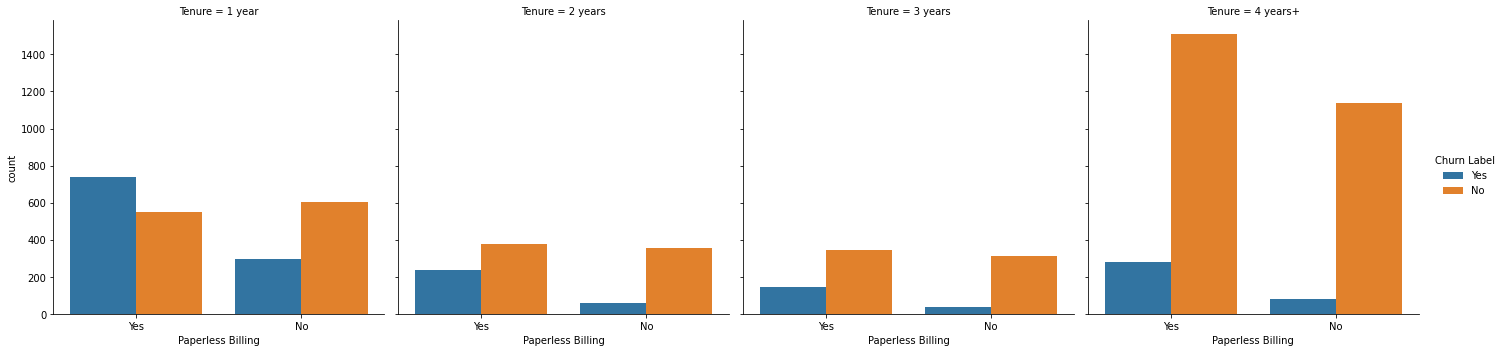

In [20]:
sns.catplot(x='Paperless Billing', hue='Churn Label', col='Tenure', kind='count', data=df)

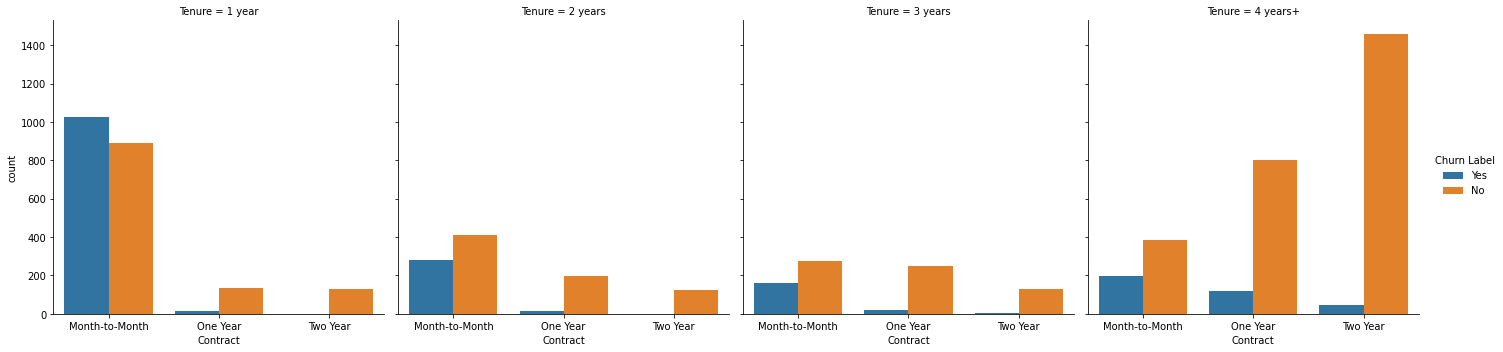

In [24]:
sns.catplot(x='Contract', hue='Churn Label', col='Tenure', kind='count', data=df)

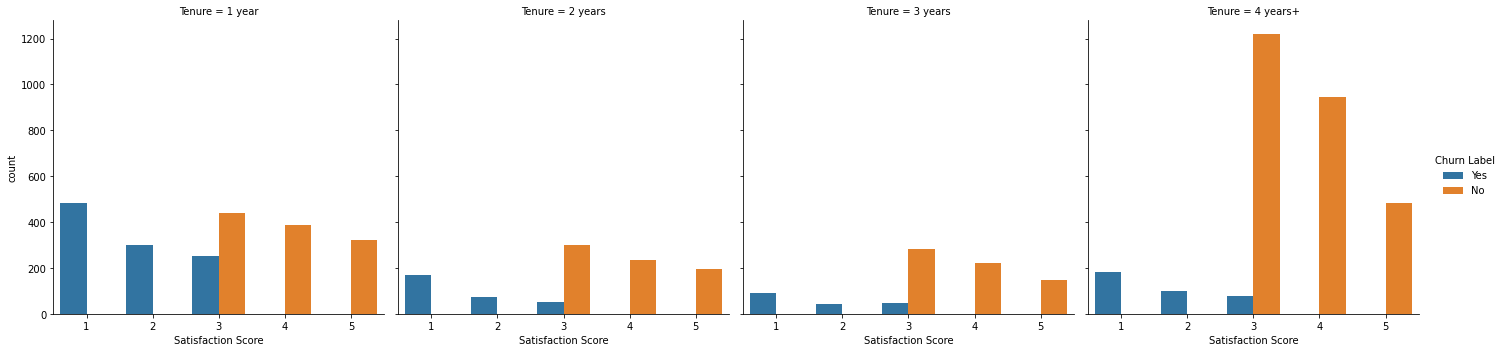

In [21]:
sns.catplot(x='Satisfaction Score', hue='Churn Label', col='Tenure', kind='count', data=df)

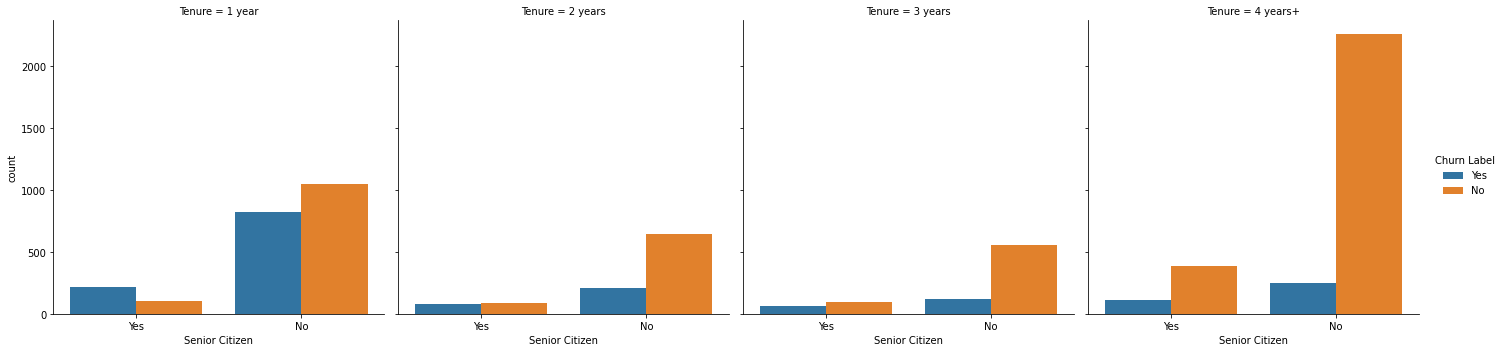

In [22]:
sns.catplot(x='Senior Citizen', hue='Churn Label', col='Tenure', kind='count', data=df)

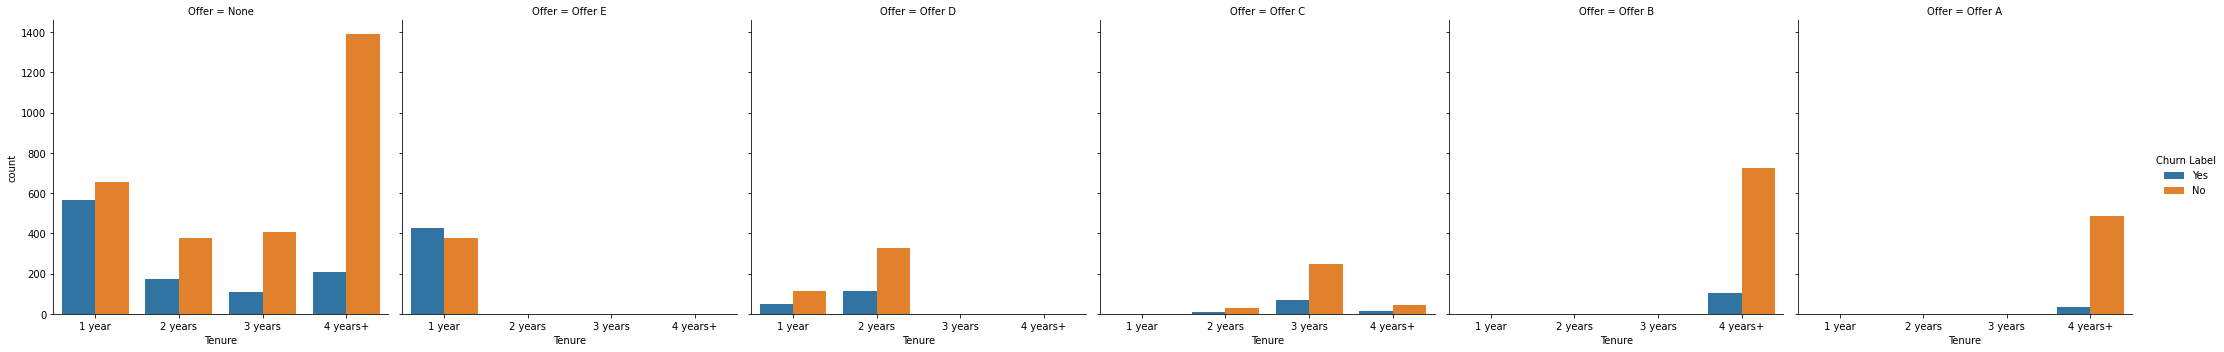

In [27]:
sns.catplot(x='Tenure', hue='Churn Label', col='Offer', kind='count', data=df)

In [24]:
# plt.scatter(Monthly Charge, y, label= "stars", color= "green",
#             marker= "*", s=30)

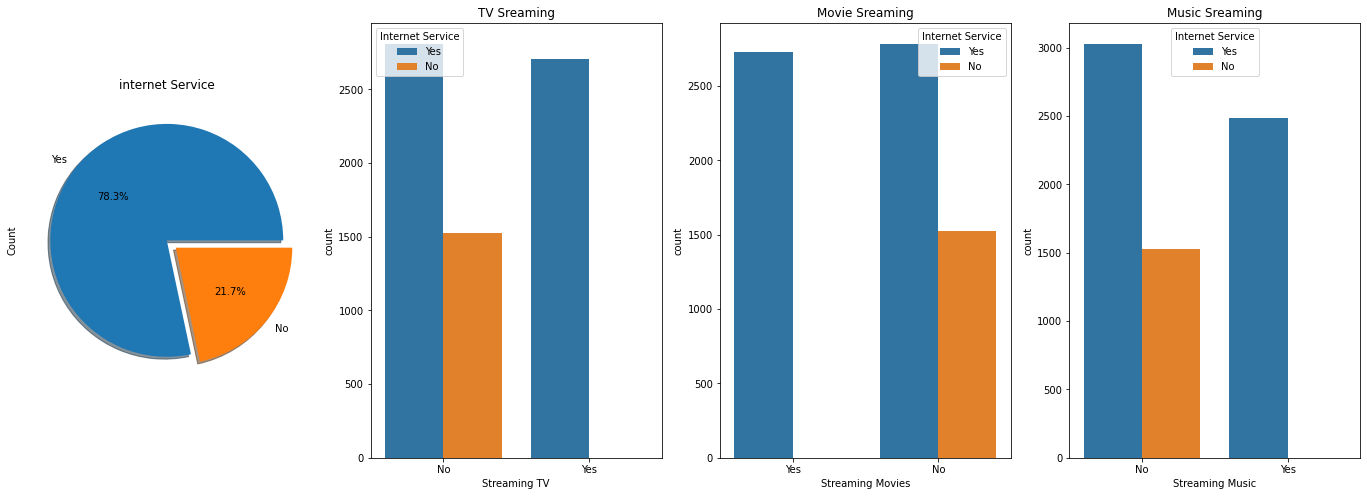

In [31]:
f,ax=plt.subplots(1,4,figsize=(24,8))
df['Internet Service'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('internet Service')
ax[0].set_ylabel('Count')
sns.countplot('Streaming TV',hue='Internet Service',data=df,ax=ax[1])
ax[1].set_title('TV Sreaming')
sns.countplot('Streaming Movies',hue='Internet Service',data=df,ax=ax[2])
ax[2].set_title('Movie Sreaming')
sns.countplot('Streaming Music',hue='Internet Service',data=df,ax=ax[3])
ax[3].set_title('Music Sreaming')
plt.show()

<AxesSubplot:xlabel='Internet Service', ylabel='Monthly Charge'>

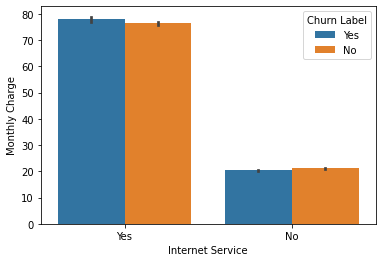

In [30]:
#sns.relplot(x='Monthly Charge', y='hosting_c', hue='Churn Label',data =Airbnb_data[(Airbnb_data.room_type == 'Private room')])
sns.barplot(x='Internet Service', y='Monthly Charge', hue='Churn Label',data =df)

<AxesSubplot:xlabel='Satisfaction Score', ylabel='count'>

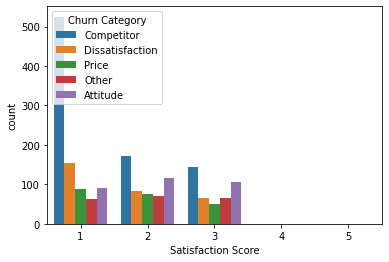

In [29]:
sns.countplot('Satisfaction Score', hue='Churn Category',data =df)

<AxesSubplot:>

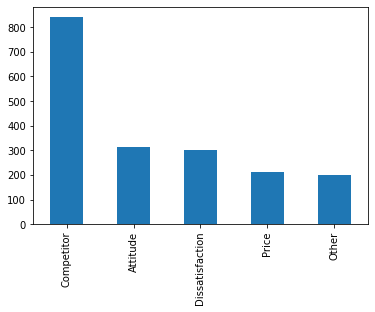

In [39]:
df['Churn Category'].value_counts().plot.bar()

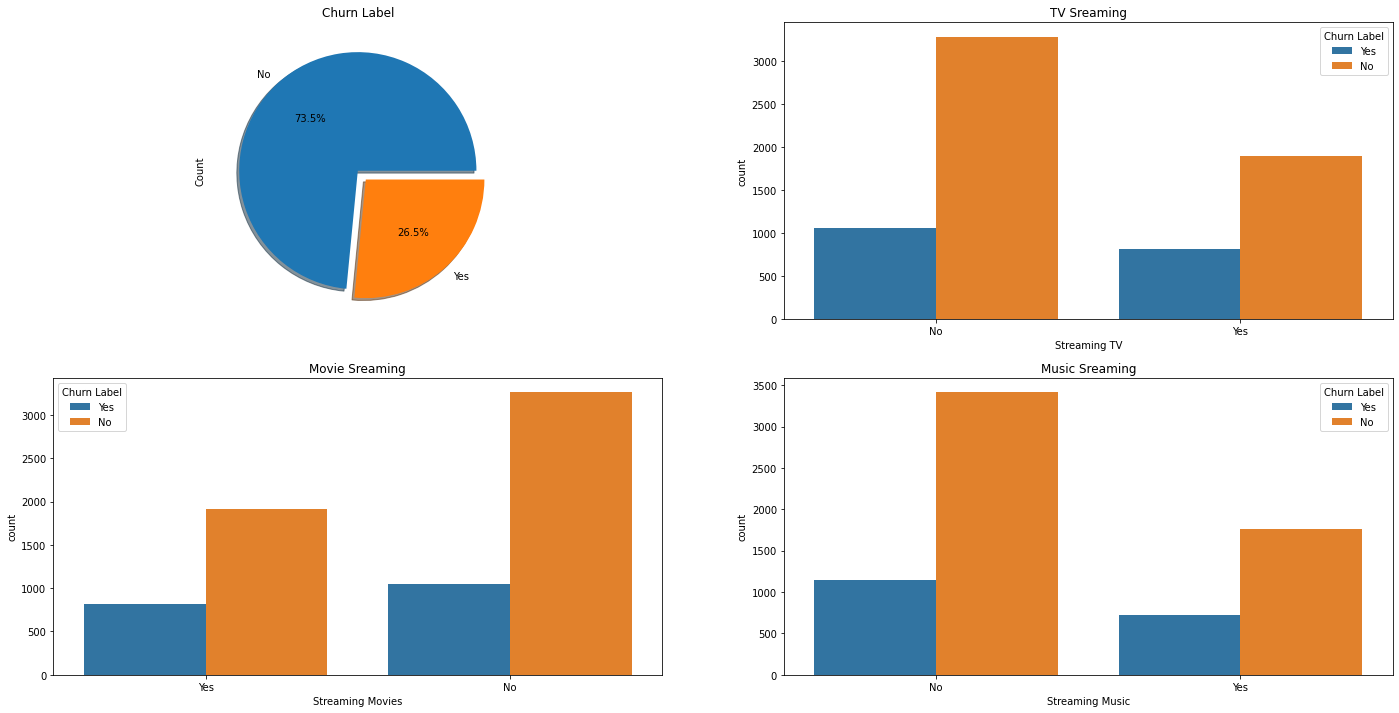

In [32]:
f,ax=plt.subplots(2,2,figsize=(24,12))
df['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0], shadow=True)
ax[0,0].set_title('Churn Label')
ax[0,0].set_ylabel('Count')
sns.countplot('Streaming TV',hue='Churn Label',data=df,ax=ax[0,1])
ax[0,1].set_title('TV Sreaming')
sns.countplot('Streaming Movies',hue='Churn Label',data=df,ax=ax[1,0])
ax[1,0].set_title('Movie Sreaming')
sns.countplot('Streaming Music',hue='Churn Label',data=df,ax=ax[1,1])
ax[1,1].set_title('Music Sreaming')
plt.show()

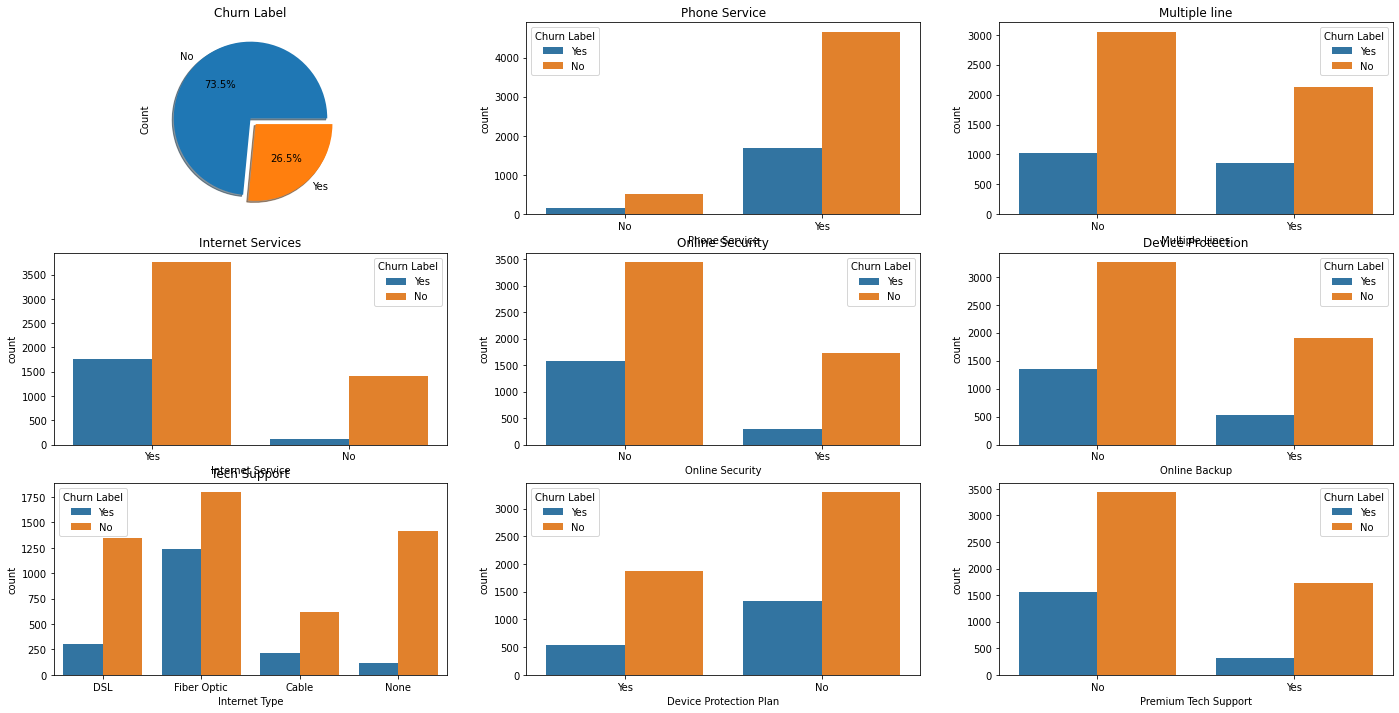

In [34]:
f,ax=plt.subplots(3,3,figsize=(24,12))
df['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0], shadow=True)
ax[0,0].set_title('Churn Label')
ax[0,0].set_ylabel('Count')
sns.countplot('Phone Service',hue='Churn Label',data=df,ax=ax[0,1])
ax[0,1].set_title('Phone Service')
sns.countplot('Multiple Lines',hue='Churn Label',data=df,ax=ax[0,2])
ax[0,2].set_title('Multiple line')
sns.countplot('Internet Service',hue='Churn Label',data=df,ax=ax[1,0])
ax[1,0].set_title('Internet Services')
sns.countplot('Online Security',hue='Churn Label',data=df,ax=ax[1,1])
ax[1,1].set_title('Online Security')
sns.countplot('Online Backup',hue='Churn Label',data=df,ax=ax[1,2])
ax[1,2].set_title('Online Backup')
sns.countplot('Internet Type',hue='Churn Label',data=df,ax=ax[2,0])
ax[2,0].set_title('Internet Type')
sns.countplot('Device Protection Plan',hue='Churn Label',data=df,ax=ax[2,1])
ax[1,2].set_title('Device Protection')
sns.countplot('Premium Tech Support',hue='Churn Label',data=df,ax=ax[2,2])
ax[2,0].set_title('Tech Support')
plt.show()

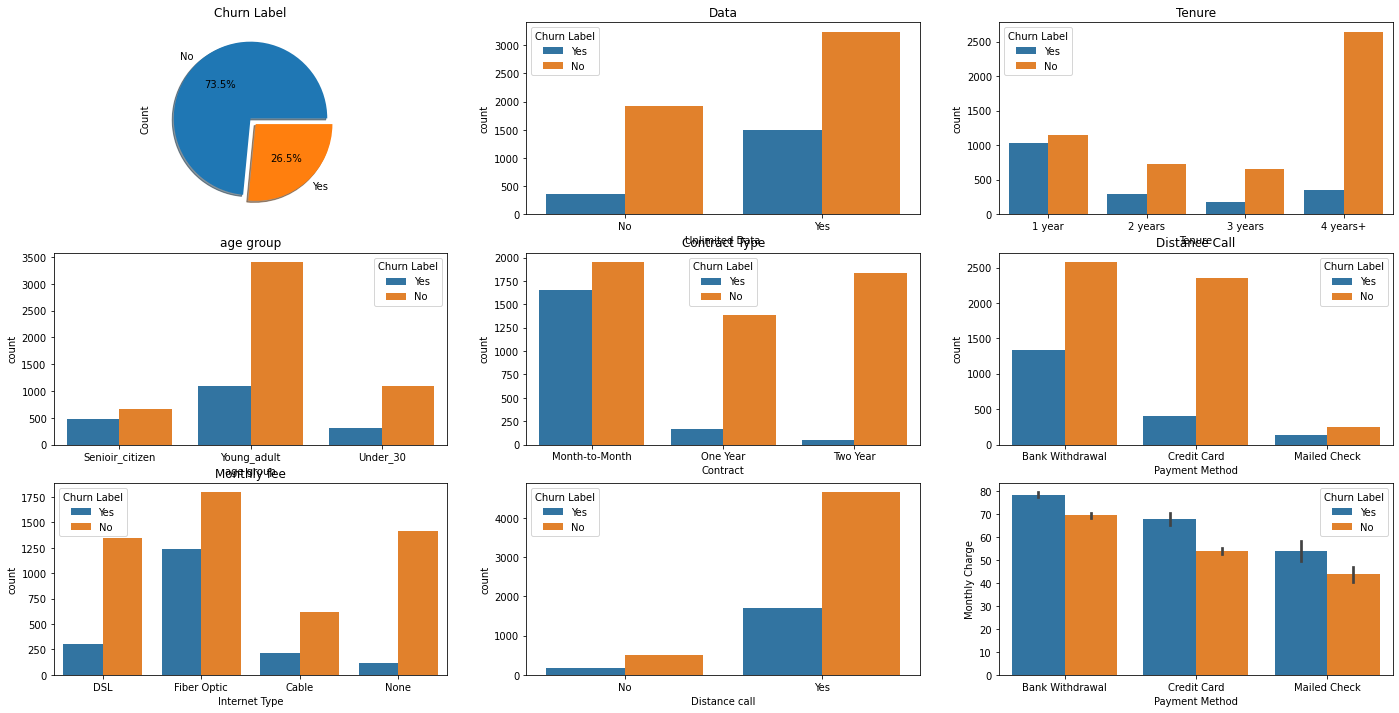

In [41]:
f,ax=plt.subplots(3,3,figsize=(24,12))
df['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0], shadow=True)
ax[0,0].set_title('Churn Label')
ax[0,0].set_ylabel('Count')
sns.countplot('Unlimited Data',hue='Churn Label',data=df,ax=ax[0,1])
ax[0,1].set_title('Data')
sns.countplot('Tenure',hue='Churn Label',data=df,ax=ax[0,2])
ax[0,2].set_title('Tenure')
sns.countplot('age group',hue='Churn Label',data=df,ax=ax[1,0])
ax[1,0].set_title('age group')
sns.countplot('Contract',hue='Churn Label',data=df,ax=ax[1,1])
ax[1,1].set_title('Contract Type')
sns.countplot('Payment Method',hue='Churn Label',data=df,ax=ax[1,2])
ax[1,2].set_title('Payment Method')
sns.countplot('Internet Type',hue='Churn Label',data=df,ax=ax[2,0])
ax[2,0].set_title('Internet Type')
sns.countplot('Distance call',hue='Churn Label',data=df,ax=ax[2,1])
ax[1,2].set_title('Distance Call')
sns.barplot(x='Payment Method', y='Monthly Charge',hue='Churn Label',data=df,ax=ax[2,2])
ax[2,0].set_title('Monthly fee')
plt.show()

<AxesSubplot:title={'center':'Box plot for job with success outcome'}, xlabel='Monthly Charge', ylabel='Payment Method'>

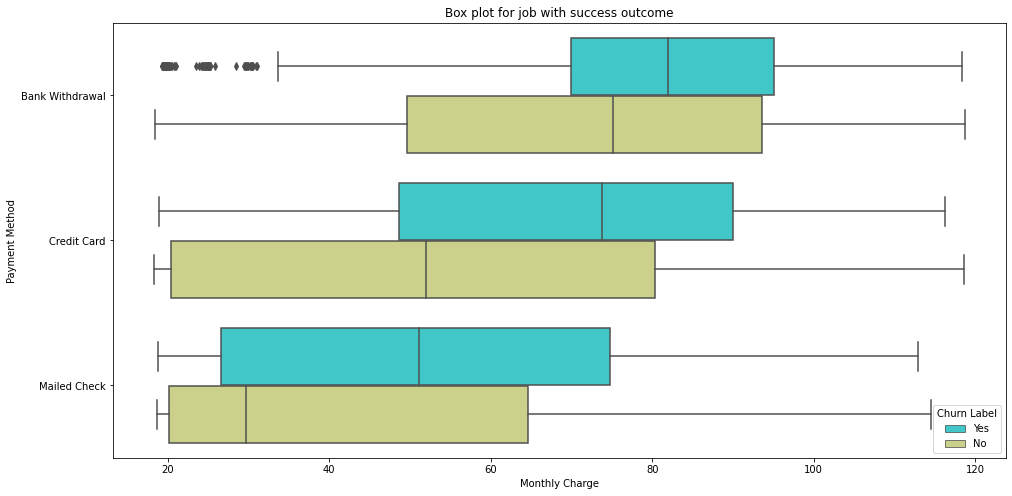

In [42]:
plt.figure(figsize=(16,8))
plt.title("Box plot for job with success outcome")
sns.boxplot(y="Payment Method", x="Monthly Charge", hue = 'Churn Label',data = df, orient="h", palette='rainbow')

#### printing unique values

In [44]:
def summary(df):
    label=[]
    Unique_Values= []
    for col in df.columns:
        label.append(df[col].unique()[:6])
        Unique_Values.append(df[col].nunique())
    return pd.DataFrame({'Values':label,'Unique_Values':Unique_Values}, index= df.columns)
summary(df)

,Values,Unique_Values
Customer ID,"[8779-QRDMV, 7495-OOKFY, 1658-BYGOY, 4598-XLKN...",7043
Count,[1],1
Gender,"[Male, Female]",2
Age,"[78, 74, 71, 80, 72, 76]",62
Married,"[No, Yes]",2
Dependents,"[No, Yes]",2
Number of Dependents,"[0, 1, 3, 2, 5, 4]",10
Referred a Friend,"[No, Yes]",2
Tenure in Months,"[1, 8, 18, 25, 37, 27]",72
Offer,"[None, Offer E, Offer D, Offer C, Offer B, Off...",6


In [25]:
df.groupby(['Churn Value']).agg(['count', 'mean']).T

Churn Value                                        0            1
Count                             count  5174.000000  1869.000000
                                  mean      1.000000     1.000000
Age                               count  5174.000000  1869.000000
                                  mean     45.344414    49.735688
Number of Dependents              count  5174.000000  1869.000000
                                  mean      0.595284     0.118245
Number of Referrals               count  5174.000000  1869.000000
                                  mean      2.468690     0.521134
Tenure in Months                  count  5174.000000  1869.000000
                                  mean     37.591225    17.979133
Avg Monthly Long Distance Charges count  5174.000000  1869.000000
                                  mean     22.883572    23.167635
Avg Monthly GB Download           count  5174.000000  1869.000000
                                  mean     19.915733    22.175495
Monthly Charge                    count  5174.000000  1869.000000
                                  mean     61.265124    74.441332
Total Charges                     count  5174.000000  1869.000000
                                  mean   2550.792103  1531.796094
Total Refunds                     count  5174.000000  1869.000000
                                  mean      2.122279     1.518983
Total Extra Data Charges          count  5174.000000  1869.000000
                                  mean      6.752996     7.158909
Total Long Distance Charges       count  5174.000000  1869.000000
                                  mean    862.952107   433.917549
Total Revenue                     count  5174.000000  1869.000000
                                  mean   3418.374927  1971.353569
Satisfaction Score                count  5174.000000  1869.000000
                                  mean      3.789911     1.736223
Churn Score                       count  5174.000000  1869.000000
                                  mean     50.098183    81.777956
CLTV                              count  5174.000000  1869.000000
                                  mean   4490.921337  4149.414660

<AxesSubplot:>

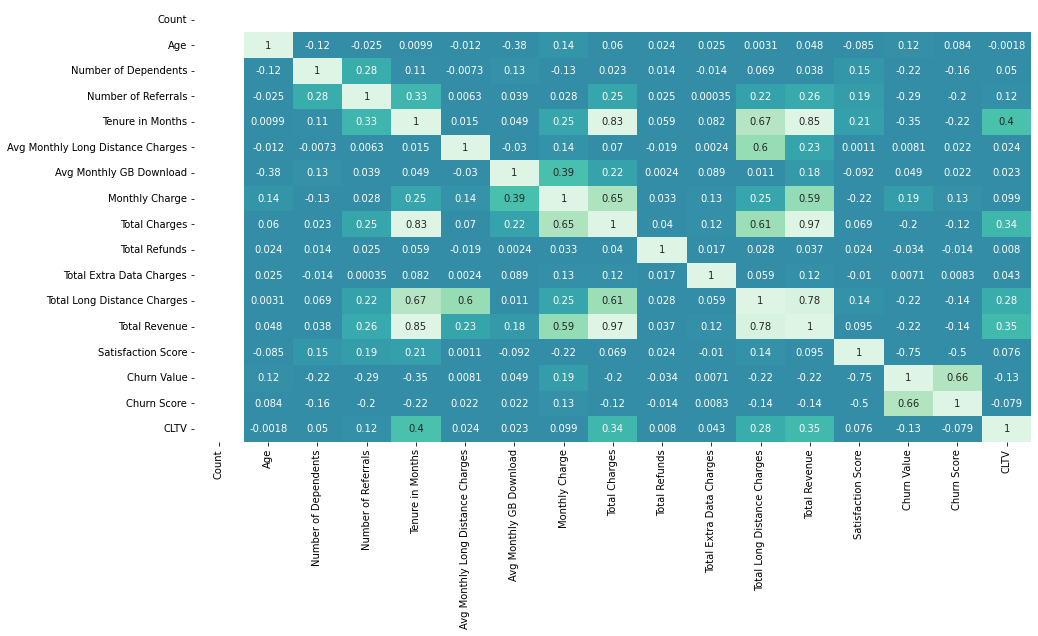

In [22]:
plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(), annot = True, cmap= 'mako', center = 0, vmin=0.1, vmax=0.8, cbar=False)

In [14]:
df= df.drop(columns= [ 'Quarter','Number of Referrals', 'Customer Status', 
                        'Churn Reason','Churn Category','CLTV', 'Churn Score',
                    'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 
                      'Total Refunds','Total Extra Data Charges','Under 30', 'Senior Citizen'])

In [25]:
df = df.to_csv("../project_main_df.csv", index = False)

In [15]:
df.columns

Index(['Customer ID', 'Count', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'Referred a Friend', 'Tenure in Months',
       'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Long Distance Charges', 'Total Revenue',
       'Satisfaction Score', 'Churn Label', 'Churn Value', 'Tenure',
       'Distance call', 'Campaign', 'age group'],
      dtype='object')

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,  mean_squared_error
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter


In [22]:
X = df.drop(columns= ['Churn Value']).copy()
Y= df['Churn Value']

In [23]:
X.columns


Index(['Customer ID', 'Count', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'Referred a Friend', 'Tenure in Months',
       'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Long Distance Charges', 'Total Revenue',
       'Satisfaction Score', 'Churn Label', 'Tenure', 'Distance call',
       'Campaign', 'age group'],
      dtype='object')

In [24]:
X = X.drop(columns=['Customer ID','Count','Gender','Churn Label', 'Age',  'Number of Dependents','Referred a Friend', 'Total Revenue', 'Tenure in Months'])
print(X.shape)
X.columns

(7043, 26)


Index(['Married', 'Dependents', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Long Distance Charges', 'Satisfaction Score',
       'Tenure', 'Distance call', 'Campaign', 'age group'],
      dtype='object')

In [25]:
def final():
                
                encode_features = [feature for feature  in X.columns if X[feature ].dtype=='O' and X[feature].nunique() == 2]
                dumy_features = [feature for feature  in X.columns if X[feature ].dtype=='O' and X[feature].nunique() >2]
                le = LabelEncoder()
                X[encode_features]=X[encode_features].apply(le.fit_transform)
                 #pd.get_dummies(X['Satisfaction Score'])
                df_data = pd.get_dummies(X, columns=dumy_features, dummy_na=False)
                final_df= df_data
                return final_df
X = final()
X.columns

Index(['Married', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges',
       'Total Long Distance Charges', 'Satisfaction Score', 'Distance call',
       'Campaign', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Tenure_1 year', 'Tenure_2 years', 'Tenure_3 years', 'Tenure_4 years+',
       'age group_Senioir_citizen', 'age group_Under_30',
       'age group_Young_adult'],
      dtype

In [26]:
X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size = 0.7)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)
X_valid.head()
print(Y_train)

(4930, 43)
(4930,)
(1056, 43)
(1056,)
(1057, 43)
(1057,)
1181    1
1904    1
3929    0
5932    0
490     0
       ..
588     0
1760    1
3420    0
1376    1
2801    0
Name: Churn Value, Length: 4930, dtype: int64


In [82]:
ex_train = X_train.copy()
ex_test = X_test.copy()

In [27]:
#scaler=StandardScaler()
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print(Counter(Y_train))

Counter({0: 3674, 1: 1256})


LR accuracy: 0.959280303030303
LR accuracy on test data: 0.9583727530747398
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       774
           1       0.94      0.90      0.92       282

    accuracy                           0.96      1056
   macro avg       0.95      0.94      0.95      1056
weighted avg       0.96      0.96      0.96      1056



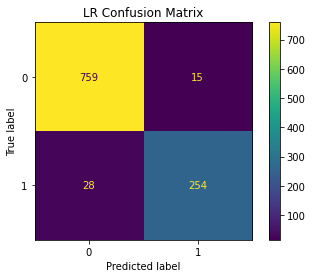

In [72]:
lr_model= LogisticRegression()
lr_model.fit(X_train, Y_train)
log_predict= lr_model.predict(X_valid)
prob= lr_model.predict_proba(X_valid)
lr_accuracy = lr_model.score(X_valid,Y_valid)
print("LR accuracy:", lr_accuracy )
## Valid dataset
lrp = precision_score(Y_valid,log_predict)
lrr = recall_score(Y_valid,log_predict)
lrf1 = f1_score(Y_valid,log_predict)
log_auc_score = roc_auc_score(Y_valid, log_predict)
logerror_v = np.sqrt(mean_squared_error(Y_valid,log_predict))

### test dataset
log_tpredict= lr_model.predict(X_test)
lr_accuracyt = lr_model.score(X_test,Y_test)
lrpt = precision_score(Y_test,log_tpredict)
lrrt = recall_score(Y_test,log_tpredict)
lrf1t = f1_score(Y_test,log_tpredict)
log_tauc_score = roc_auc_score(Y_test, log_tpredict)
error_t = np.sqrt(mean_squared_error(Y_test,log_tpredict))
print('LR accuracy on test data:',lr_accuracyt)


lrmatrix= confusion_matrix(Y_valid, log_predict)
lrplt = ConfusionMatrixDisplay(lrmatrix)
lrplt.plot()
plt.title("LR Confusion Matrix")
plt.show
print(classification_report(Y_valid, log_predict))


LR accuracy on test data: 0.9583727530747398
Best accuracy: 0.956795 using {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
LR accuracy: 0.9611742424242424
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       774
           1       0.95      0.90      0.93       282

    accuracy                           0.96      1056
   macro avg       0.96      0.94      0.95      1056
weighted avg       0.96      0.96      0.96      1056



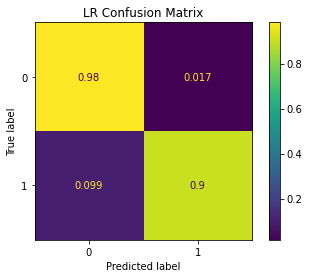

In [73]:
lr_modeltune= LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'C'       : np.logspace(-3,3,7),
            'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
            }

grid_search_log = GridSearchCV(lr_modeltune, param_grid=param_grid, scoring = 'accuracy')
grid_result = grid_search_log.fit(X_train, Y_train)
predict_logtune= grid_search_log.predict(X_valid)
lr_accuracy_tuned = accuracy_score(Y_valid, predict_logtune)
lrp_tuned = precision_score(Y_valid,predict_logtune)
lrr_tuned = recall_score(Y_valid,predict_logtune)
lrf1_tuned = f1_score(Y_valid,predict_logtune)
logtune_auc_score = roc_auc_score(Y_valid, predict_logtune)
logtune_error_v = np.sqrt(mean_squared_error(Y_valid,log_predict))


### test dataset
predict_logtunet= grid_search_log.predict(X_test)
lr_accuracy_tunedt = accuracy_score(Y_test,predict_logtunet)
lrpt_tuned = precision_score(Y_test,predict_logtunet)
lrrt_tuned = recall_score(Y_test,predict_logtunet)
lrf1t_tuned = f1_score(Y_test,predict_logtunet)
logtune_tauc_score = roc_auc_score(Y_test, predict_logtunet)
logtune_error_t = np.sqrt(mean_squared_error(Y_test,predict_logtunet))
print('LR accuracy on test data:',lr_accuracy_tunedt)

# summarize results
print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("LR accuracy:", lr_accuracy_tuned )

lrmatrix= confusion_matrix(Y_valid, predict_logtune, normalize= 'true')
lrplt = ConfusionMatrixDisplay(lrmatrix)
lrplt.plot()
plt.title("LR Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict_logtune ))

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(Y_valid,predict2)*100)
print("RMSE: ",np.sqrt(mean_squared_error(Y_valid,predict2)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(Y_valid).flatten(), 'Predicted Values': predict2.flatten()})
error_diff.head(20)


R2 score:  84.27883769505962
RMSE:  0.1767766952966369


,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,0,0


RF accuracy: 0.9498106060606061
RF accuracy on test data: 0.9498580889309366
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       754
           1       0.99      0.83      0.90       302

    accuracy                           0.95      1056
   macro avg       0.96      0.92      0.94      1056
weighted avg       0.95      0.95      0.95      1056



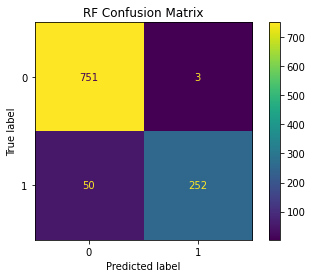

In [29]:
RF_model= RandomForestClassifier()
RF_model.fit(X_train, Y_train)
predictrf= RF_model.predict(X_valid)
RF_accuracy = RF_model.score(X_valid,Y_valid)
print("RF accuracy:", RF_accuracy )
rfp = precision_score(Y_valid,predictrf)
rfr = recall_score(Y_valid,predictrf)
rff1 = f1_score(Y_valid,predictrf)
rf_auc_score = roc_auc_score(Y_valid, predictrf)
rferror_v = np.sqrt(mean_squared_error(Y_valid,predictrf))

### test dataset
predictrf_t= RF_model.predict(X_test)
RF_accuracy_t =  RF_model.score(X_test,Y_test)
rfpt = precision_score(Y_test,predictrf_t)
rfrt = recall_score(Y_test,predictrf_t)
rff1t = f1_score(Y_test,predictrf_t)
rf_tauc_score = roc_auc_score(Y_test,predictrf_t)
rferror_t = np.sqrt(mean_squared_error(Y_test,predictrf_t))
print('RF accuracy on test data:',RF_accuracy_t )

RFmatrix= confusion_matrix(Y_valid, predictrf)
RFplt = ConfusionMatrixDisplay(RFmatrix)
RFplt.plot()
plt.title("RF Confusion Matrix")
plt.show
print(classification_report(Y_valid, predictrf))

0.9634888438133874 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
RandomForestClassifier(min_samples_split=7, n_estimators=25, n_jobs=-1,
                       random_state=123)
RF accuracy: 0.9517045454545454
RFtune accuracy on test data: 0.9489120151371807
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       754
           1       0.99      0.84      0.91       302

    accuracy                           0.95      1056
   macro avg       0.96      0.92      0.94      1056
weighted avg       0.95      0.95      0.95      1056



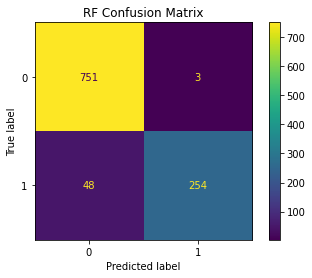

In [28]:
model=RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
gsrf_result = model1.fit(X_train, Y_train)
print(gsrf_result.best_score_, gsrf_result.best_params_)
print(gsrf_result.best_estimator_)
predictrftune= model1.predict(X_valid)
RF_accuracy_tuned = accuracy_score(Y_valid, predictrftune)
rfp_tuned = precision_score(Y_valid,predictrftune)
rfr_tuned = recall_score(Y_valid,predictrftune)
rff1_tuned = f1_score(Y_valid,predictrftune)
rftune_auc_score = roc_auc_score(Y_valid, predictrftune)
print("RF accuracy:", RF_accuracy_tuned )
rftuneerror_v = np.sqrt(mean_squared_error(Y_valid,predictrftune))

### test dataset
predictrftune_t= model1.predict(X_test)
RF_accuracy_tuned_t = accuracy_score(Y_test,predictrftune_t)
rfpt_tuned = precision_score(Y_test,predictrftune_t)
rfrt_tuned = recall_score(Y_test,predictrftune_t)
rff1t_tuned = f1_score(Y_test,predictrftune_t)
rftune_tauc_score = roc_auc_score(Y_test, predictrftune_t)
rftune_error_t = np.sqrt(mean_squared_error(Y_test,predictrftune_t))
print('RFtune accuracy on test data:',RF_accuracy_tuned_t)

RFmatrix= confusion_matrix(Y_valid,predictrftune)
RFplt = ConfusionMatrixDisplay(RFmatrix)
RFplt.plot()
plt.title("RF Confusion Matrix")
plt.show
print(classification_report(Y_valid, predictrftune ))

DT accuracy: 0.9365530303030303
DT accuracy on test data: 0.9394512771996215
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       774
           1       0.87      0.89      0.88       282

    accuracy                           0.94      1056
   macro avg       0.92      0.92      0.92      1056
weighted avg       0.94      0.94      0.94      1056



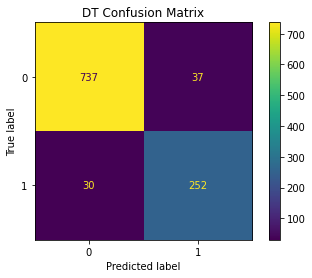

In [76]:
DT_model= DecisionTreeClassifier()
#DT_model= DecisionTreeClassifier(criterion= 'gini', max_depth= 9)
DT_model.fit(X_train, Y_train)
predictdt= DT_model.predict(X_valid)
DT_accuracy = DT_model.score(X_valid,Y_valid)
print("DT accuracy:", DT_accuracy )
dtp = precision_score(Y_valid,predictdt)
dtr = recall_score(Y_valid,predictdt)
dtf1 = f1_score(Y_valid,predictdt)
dt_auc_score = roc_auc_score(Y_valid, predictdt)
dterror_v = np.sqrt(mean_squared_error(Y_valid,predictdt))

### test dataset
predictdt_t= DT_model.predict(X_test)
DT_accuracy_t = DT_model.score(X_test,Y_test)
dtpt = precision_score(Y_test,predictdt_t)
dtrt = recall_score(Y_test,predictdt_t)
dtf1t = f1_score(Y_test,predictdt_t)
dt_tauc_score = roc_auc_score(Y_test, predictdt_t)
dterror_t = np.sqrt(mean_squared_error(Y_test,predictdt_t))
print('DT accuracy on test data:',DT_accuracy_t)


DTmatrix= confusion_matrix(Y_valid, predictdt)
DTplt = ConfusionMatrixDisplay(DTmatrix)
DTplt.plot()
plt.title("DT Confusion Matrix")
plt.show
print(classification_report(Y_valid, predictdt ))

DT accuracy: 0.8428030303030303
LR accuracy on test data: 0.8599810785241249
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       774
           1       0.71      0.69      0.70       282

    accuracy                           0.84      1056
   macro avg       0.80      0.79      0.80      1056
weighted avg       0.84      0.84      0.84      1056

0.9184584178498986 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 13, 'random_state': 123}
DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=13, random_state=123)


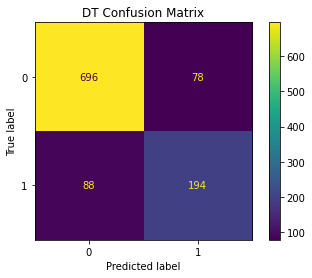

In [77]:
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123],
         'criterion':['gini', 'entropy'],
         'max_depth':[2,3,5,7,9,10]}
#Making models with hyper parameters sets
dmodel = GridSearchCV(model, param_grid=params, n_jobs=-1)
gsdt_result = dmodel.fit(X_train, Y_train)
predictdttune= dmodel.predict(X_valid)
DT_accuracy_tuned = dmodel.score(X_valid,Y_valid)
print("DT accuracy:", DT_accuracy_tuned )
dtp_tuned = precision_score(Y_valid,predictdttune)
dtr_tuned = recall_score(Y_valid,predictdttune)
dtf1_tuned = f1_score(Y_valid,predictdttune)
dttune_auc_score = roc_auc_score(Y_valid, predictdttune)
dttuneerror_v = np.sqrt(mean_squared_error(Y_valid,predictdt))

### test dataset
predictdttune_t= dmodel.predict(X_test)
dt_accuracy_tunedt = accuracy_score(Y_test,predictdttune_t)
dtpt_tuned = precision_score(Y_test,predictdttune_t)
dtrt_tuned = recall_score(Y_test,predictdttune_t)
dtf1t_tuned = f1_score(Y_test,predictdttune_t)
dttune_tauc_score = roc_auc_score(Y_test, predictdttune_t)
dttune_error_t = np.sqrt(mean_squared_error(Y_test,predictdttune_t))
print('LR accuracy on test data:',dt_accuracy_tunedt)

DTmatrix= confusion_matrix(Y_valid, predictdttune)
DTplt = ConfusionMatrixDisplay(DTmatrix)
DTplt.plot()
plt.title("DT Confusion Matrix")
plt.show
print(classification_report(Y_valid, predictdttune ))
print(gsdt_result.best_score_, gsdt_result.best_params_)
print(gsdt_result.best_estimator_)

### Result on Valid Data

In [78]:
data= {'Classifier':['DecisionTree','DecisionTree_Tuned', 'log-regression','log-regression_Tuned', 'RandomForest','RandomForest_Tuned'], 'Accuracy_Score':[DT_accuracy,DT_accuracy_tuned, lr_accuracy,lr_accuracy_tuned, RF_accuracy,RF_accuracy_tuned], 'Precision Score':[dtp,dtp_tuned,lrp, lrp_tuned,rfp, rfp_tuned], 'Recall Score':[dtr,dtr_tuned,lrr, lrr_tuned,rfr, rfr_tuned], 'F1 Score':[dtf1,dtf1_tuned,lrf1, lrf1_tuned,rff1, rff1_tuned], 'AUC Score':[dt_auc_score, dttune_auc_score, log_auc_score, logtune_auc_score, rf_auc_score, rftune_auc_score],
      'Error':[dterror_v, dttuneerror_v, logerror_v, logtune_error_v, rferror_v, rftuneerror_v]
      }
# accuracy = pd.DataFrame(data)
scores = pd.DataFrame(data)
scores.sort_values(by= "AUC Score", ascending= False)

,Classifier,Accuracy_Score,Precision Score,Recall Score,F1 Score,AUC Score,Error
3,log-regression_Tuned,0.961174,0.951311,0.900709,0.925319,0.941957,0.201791
2,log-regression,0.959280,0.944238,0.900709,0.921960,0.940665,0.201791
5,RandomForest_Tuned,0.956439,0.953846,0.879433,0.915129,0.931964,0.208712
4,RandomForest,0.959280,0.972332,0.872340,0.919626,0.931648,0.201791
0,DecisionTree,0.936553,0.871972,0.893617,0.882662,0.922907,0.251887
1,DecisionTree_Tuned,0.842803,0.713235,0.687943,0.700361,0.793584,0.251887


### Result on Test data

In [79]:
test_data= {'Classifier':['DecisionTree','DecisionTree_Tuned', 'log-regression','log-regression_Tuned', 'RandomForest','RandomForest_Tuned'], 'Accuracy_Score':[DT_accuracy_t,dt_accuracy_tunedt, lr_accuracyt,lr_accuracy_tunedt, RF_accuracy_t,RF_accuracy_tuned_t], 'Precision Score':[dtpt,dtpt_tuned,lrpt, lrpt_tuned,rfpt, rfpt_tuned], 'Recall Score':[dtrt,dtrt_tuned,lrrt, lrrt_tuned,rfrt, rfrt_tuned], 'F1 Score':[dtf1t,dtf1t_tuned,lrf1t, lrf1t_tuned,rff1t, rff1t_tuned], 'AUC Score':[dt_tauc_score, dttune_tauc_score, log_tauc_score, logtune_tauc_score, rf_tauc_score, rftune_tauc_score],
      'Error':[dterror_t, dttune_error_t, error_t,logtune_error_t, rferror_t, rftune_error_t]
      }
# accuracy = pd.DataFrame(data)
scores = pd.DataFrame(test_data)
scores.sort_values(by= "AUC Score", ascending= False)

,Classifier,Accuracy_Score,Precision Score,Recall Score,F1 Score,AUC Score,Error
5,RandomForest_Tuned,0.964995,0.987705,0.876364,0.928709,0.936264,0.187096
2,log-regression,0.958373,0.949416,0.887273,0.917293,0.935324,0.204028
3,log-regression_Tuned,0.958373,0.949416,0.887273,0.917293,0.935324,0.204028
4,RandomForest,0.961211,0.987500,0.861818,0.920388,0.928991,0.196949
0,DecisionTree,0.939451,0.883636,0.883636,0.883636,0.921358,0.246067
1,DecisionTree_Tuned,0.859981,0.757085,0.680000,0.716475,0.801637,0.374191


In [97]:
scores.to_csv("../report.csv", index = False)

### AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

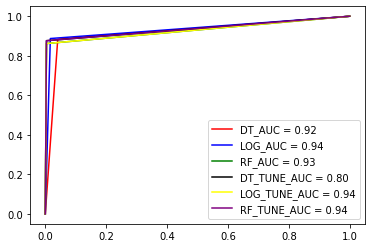

In [82]:
fpr1, tpr1, threshold = roc_curve(Y_test, predictdt_t)
fpr2, tpr2, threshold = roc_curve(Y_test, log_tpredict)
fpr3, tpr3, threshold = roc_curve(Y_test, predictrf_t)
fpr4, tpr4, threshold = roc_curve(Y_test, predictdttune_t)
fpr4, tpr4, threshold = roc_curve(Y_test, predict_logtunet)
fpr4, tpr4, threshold = roc_curve(Y_test, predictrftune_t)
plt.plot(fpr1, tpr1, color = 'red', label= 'DT_AUC = %0.2f' % dt_tauc_score)
plt.plot(fpr2, tpr2, color = 'blue', label= 'LOG_AUC = %0.2f' % log_tauc_score)
plt.plot(fpr3, tpr3, color = 'green', label= 'RF_AUC = %0.2f' % rf_tauc_score)
plt.plot(fpr4, tpr4, color = 'black', label= 'DT_TUNE_AUC = %0.2f' % dttune_tauc_score)
plt.plot(fpr3, tpr3, color = 'yellow', label= 'LOG_TUNE_AUC = %0.2f' % logtune_tauc_score)
plt.plot(fpr4, tpr4, color = 'purple', label= 'RF_TUNE_AUC = %0.2f' %  rftune_tauc_score)
plt.legend(loc = 'lower right')

plt.show

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn import tree
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_data=np.array(ex_train), mode='classification', feature_names=ex_train.columns)
# storing a new observation
i = 6
X_observation = ex_test.iloc[20]

# RF prediction: {RF_model.predict(X_observation)[0]}

In [90]:
# explanation using the random forest model
explanation = explainer.explain_instance(data_row=ex_test.iloc[20],predict_fn=RF_model.predict_proba, num_features=10)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.5691432799366107


In [87]:
xcols = ex_test.columns

In [96]:
X_train = pd.DataFrame(X_test, columns = [xcols])
feature_score = pd.Series(RF_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_score

Satisfaction Score                0.475196
Contract_Month-to-Month           0.057270
Total Charges                     0.056938
Monthly Charge                    0.055435
Total Long Distance Charges       0.051366
Contract_Two Year                 0.024547
Internet Type_Fiber Optic         0.023493
Dependents                        0.020138
Tenure_1 year                     0.016507
age group_Senioir_citizen         0.015798
Tenure_4 years+                   0.015625
Online Security                   0.013059
Payment Method_Credit Card        0.011518
Paperless Billing                 0.010341
Contract_One Year                 0.009632
Premium Tech Support              0.009396
Married                           0.009066
Internet Service                  0.008945
Streaming Music                   0.007699
Payment Method_Bank Withdrawal    0.007683
Multiple Lines                    0.007341
Offer_Offer E                     0.007025
age group_Young_adult             0.006665
Internet Ty

NotImplementedError: isna is not defined for MultiIndex

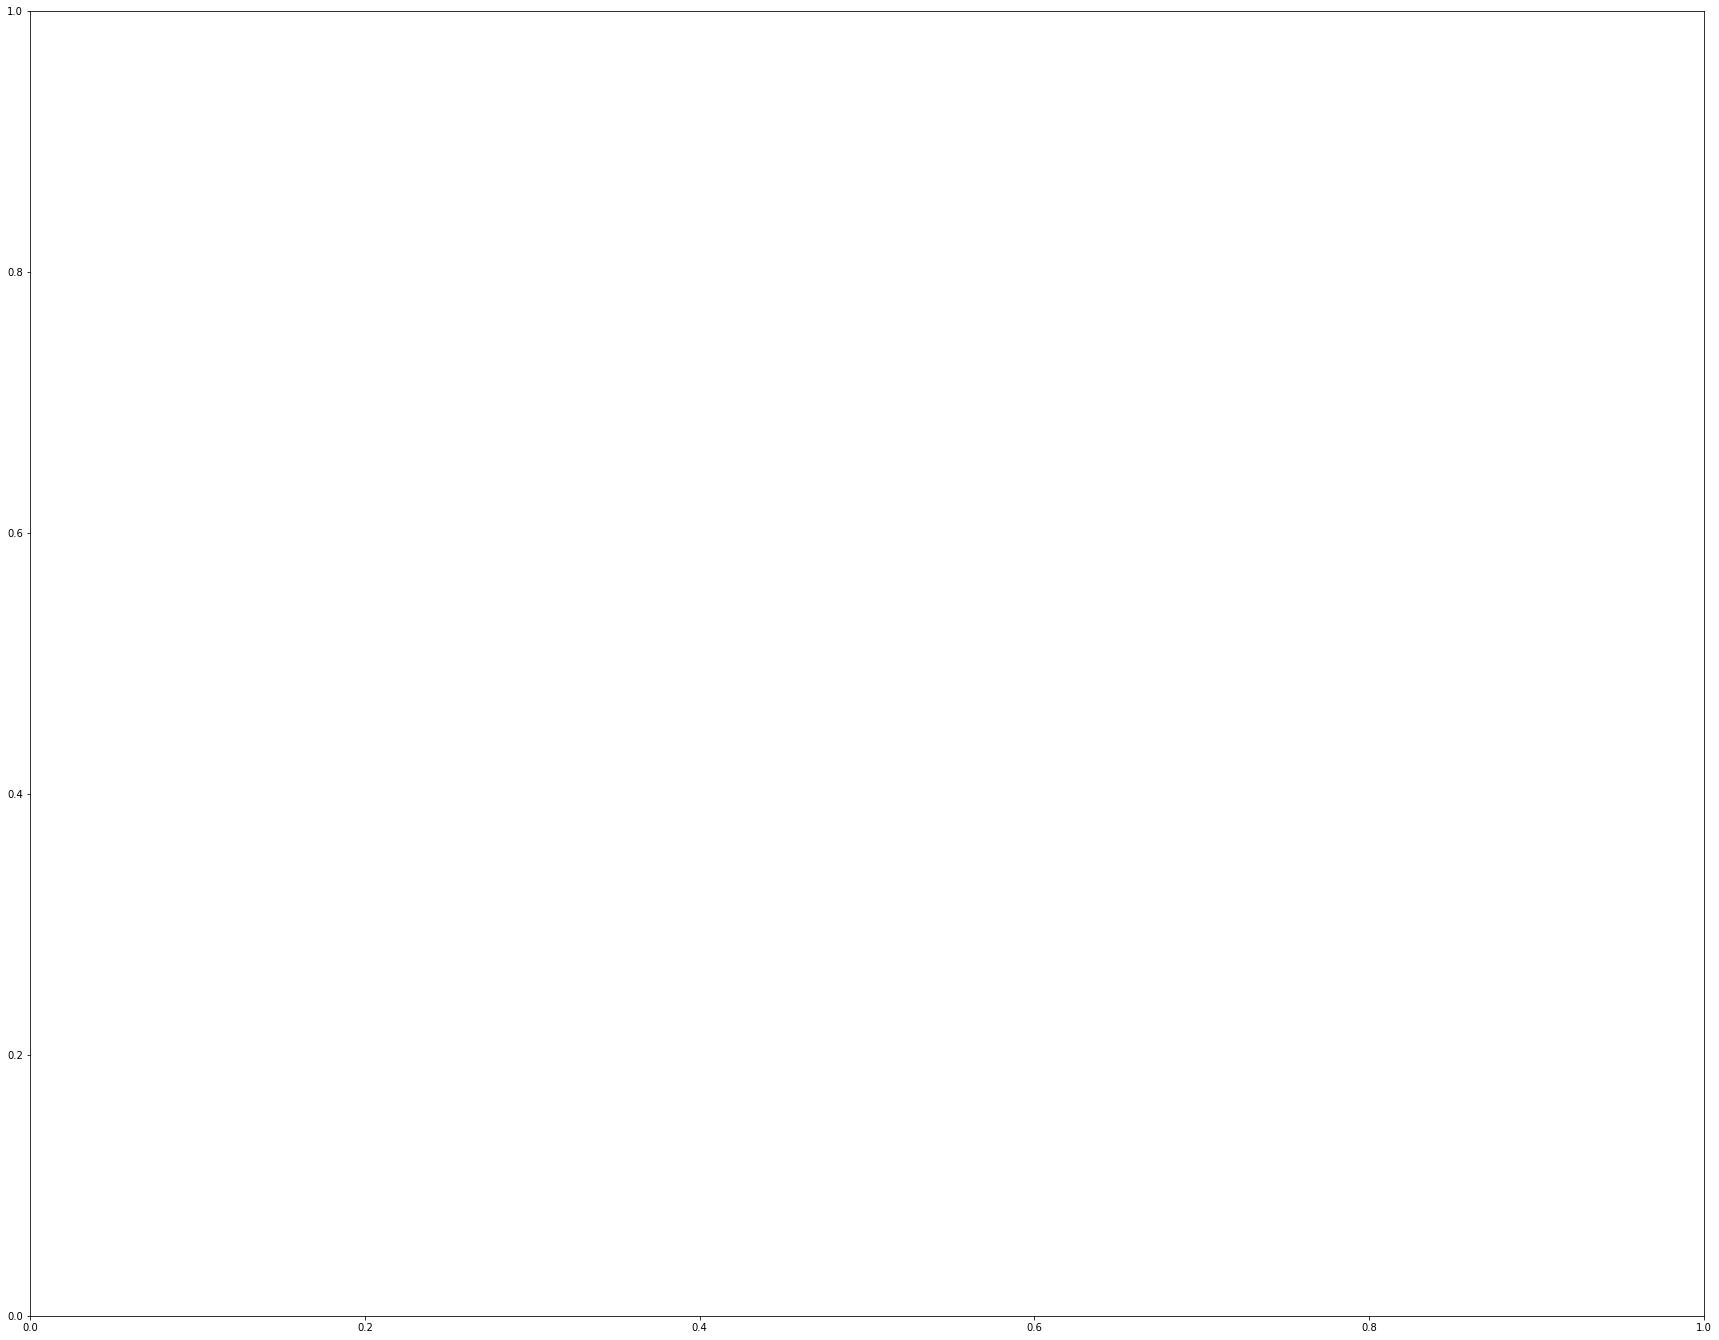

In [108]:
# f, ax = plt.subplots(figsize=(30,24))

# ax= sns.barplot(x= feature_score, y= feature_score.index, data= df_new)
# plt.show

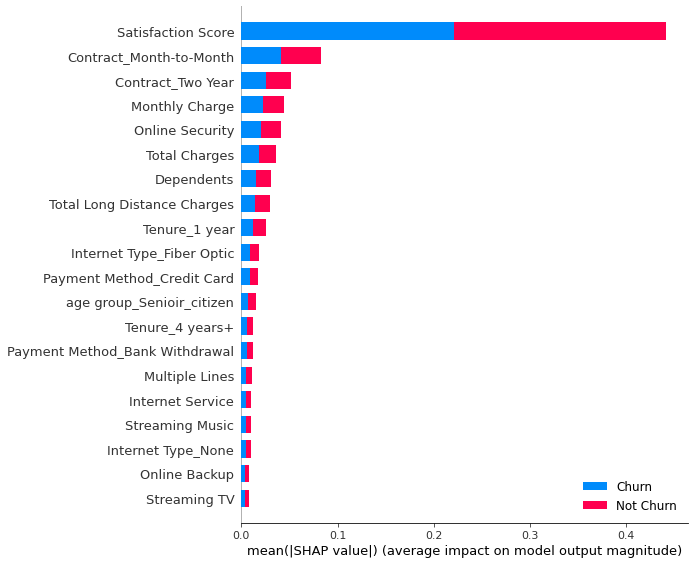

In [86]:
import shap
shap.initjs()
subset = ex_test.iloc[0:50]
explainer = shap.TreeExplainer(RF_model, subset)
shap_values = explainer.shap_values(subset, check_additivity=False)
shap.summary_plot(shap_values, subset,class_names=['Not Churn', 'Churn'])

In [31]:
import pickle

In [100]:
file = open('../streamlit/RandomForest model.pkl', 'wb')
pickle.dump(model1, file)